In [1]:
import os
from fidelity_simulation import FidelitySimulation
from pulse import RectangleReadoutPulse

In [2]:
current_path = os.path.abspath("")
data_dir_path = os.path.join(current_path, "data")
s_parameters_file_state_1 = os.path.join(data_dir_path,
                                         "hfss_resonance_simulator_Resonator_7252612e-6GHz_2_ports_v12_shifted_mock_156_kHz.s2p")
s_parameters_file_state_0 = os.path.join(data_dir_path,
                                         "hfss_resonance_simulator_Resonator_7252612e-6GHz_2_ports_v12.s2p")

shift_f = 156 * 10 ** 3
f_state_0 = 7.2669 * 10 ** 9
pulse_frequency = f_state_0 + shift_f / 2

In [3]:
def run(total_signal_time, pulse_samples_number):
    print("dt =", total_signal_time / pulse_samples_number * 10 ** 9, "ns")

    rect_readout_pulse = RectangleReadoutPulse(carrier_frequency=pulse_frequency,
                                               pulse_duration=3.5 * 10 ** (-6),
                                               pulse_power_dbm=-27,
                                               total_signal_time=total_signal_time,
                                               pulse_samples_number=pulse_samples_number)
    rect_readout_pulse.plot_pulse()

    fidelity_simulation = FidelitySimulation(s_parameters_file_state_0=s_parameters_file_state_0,
                                             s_parameters_file_state_1=s_parameters_file_state_1,
                                             readout_pulse=rect_readout_pulse,
                                             IQ_projection_frequency=pulse_frequency,
                                             num_iterations=20)

    fidelity_simulation.run()

dt = 0.00010460615158081053 ns


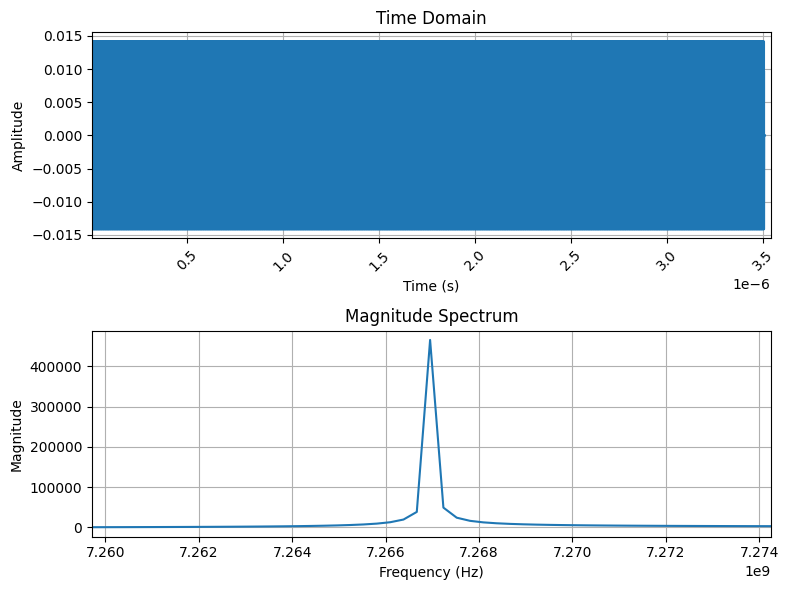

100%|██████████| 200/200 [04:06<00:00,  1.23s/it]


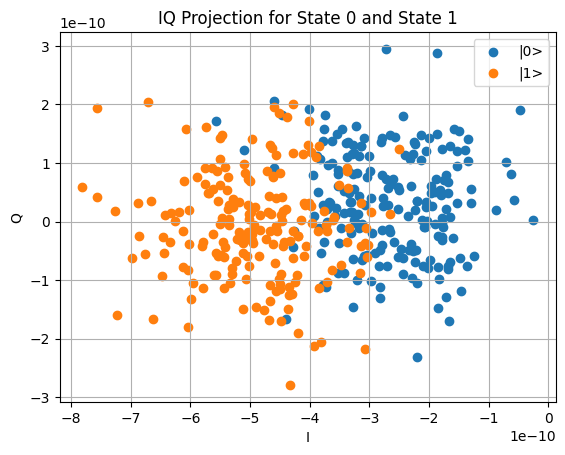

CPU times: user 8.12 s, sys: 7.66 s, total: 15.8 s
Wall time: 8min 53s


In [10]:
%%time
run(total_signal_time=3.51 * 10 ** (-6), pulse_samples_number=2 ** 25)

dt = 0.0011920928955078125 ns


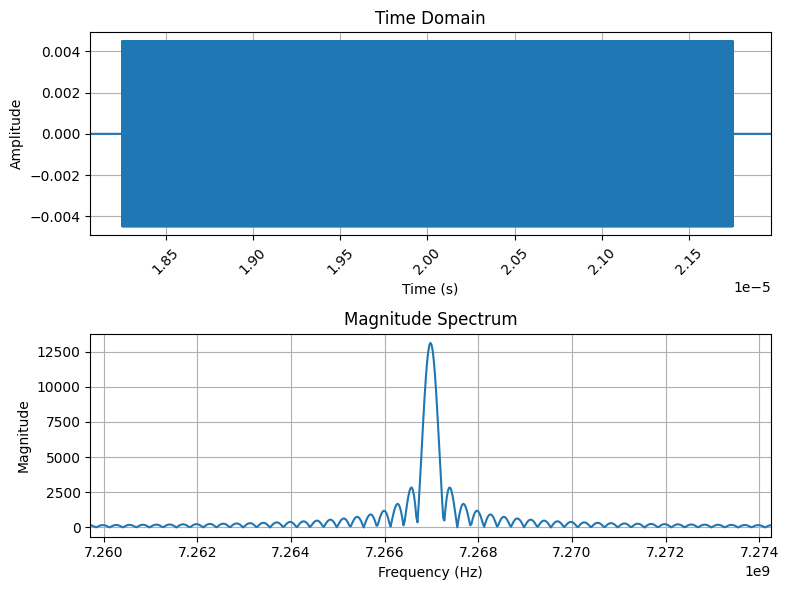

100%|██████████| 200/200 [01:17<00:00,  2.58it/s]


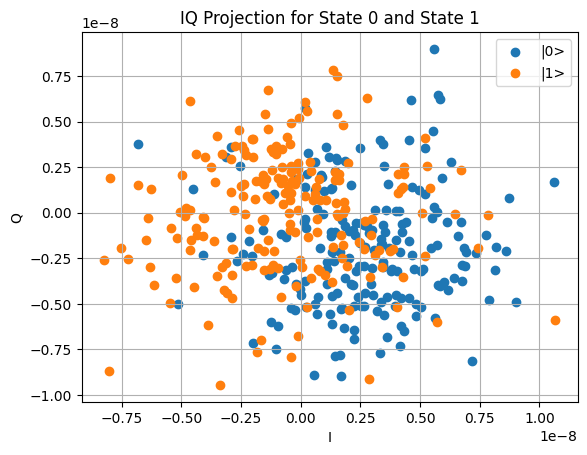

CPU times: user 7.06 s, sys: 5.65 s, total: 12.7 s
Wall time: 4min 17s


In [5]:
%%time
run(total_signal_time=4 * 10 ** (-5), pulse_samples_number=2 ** 25)

dt = 0.011920928955078125 ns


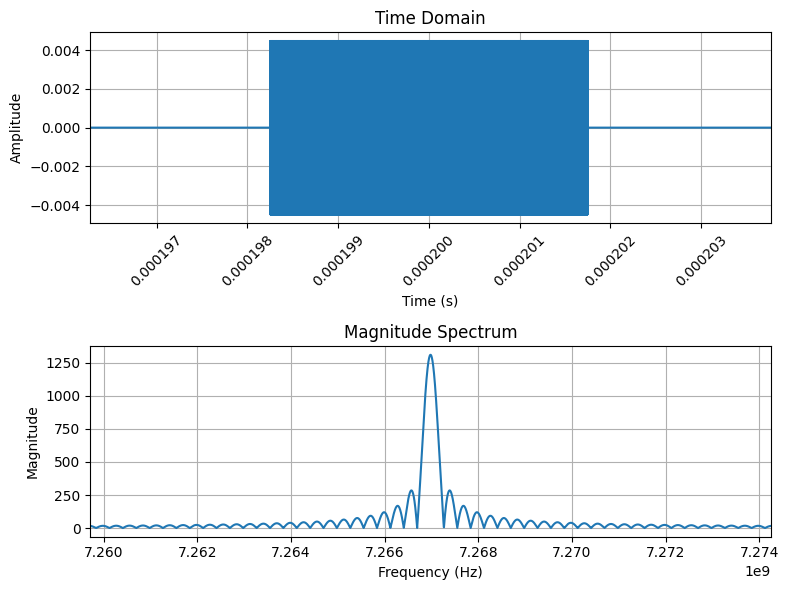

100%|██████████| 200/200 [02:38<00:00,  1.26it/s]


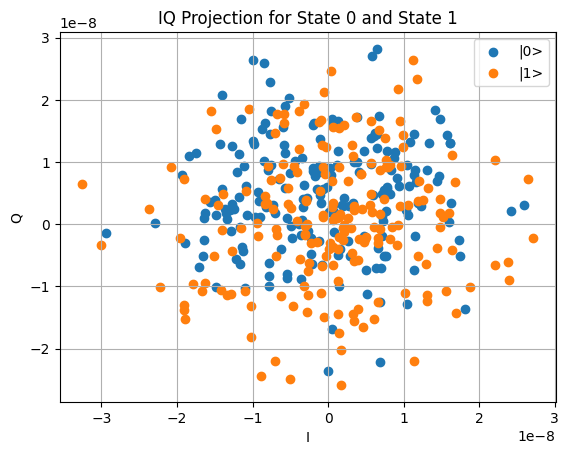

CPU times: user 6.92 s, sys: 5.86 s, total: 12.8 s
Wall time: 6min 33s


In [6]:
%%time
run(total_signal_time=4 * 10 ** (-4), pulse_samples_number=2 ** 25)

dt = 0.00010460615158081053 ns


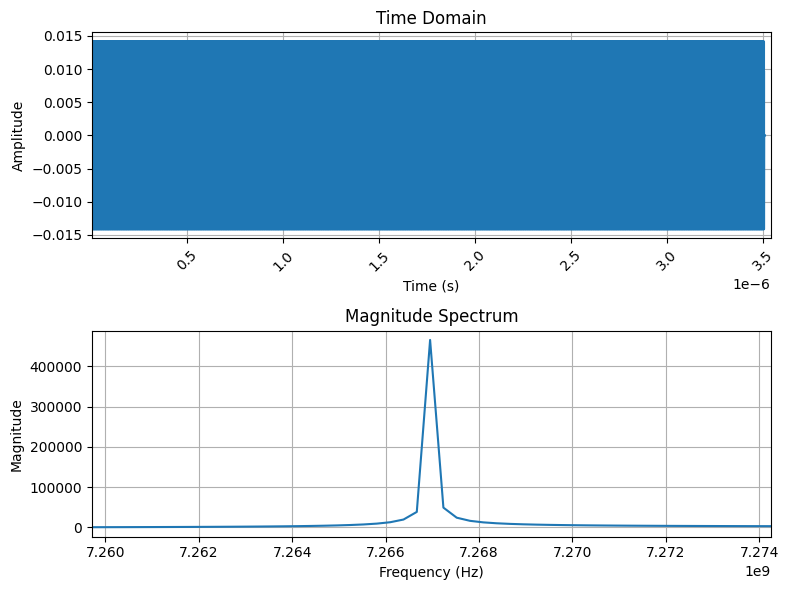

100%|██████████| 20/20 [00:17<00:00,  1.12it/s]


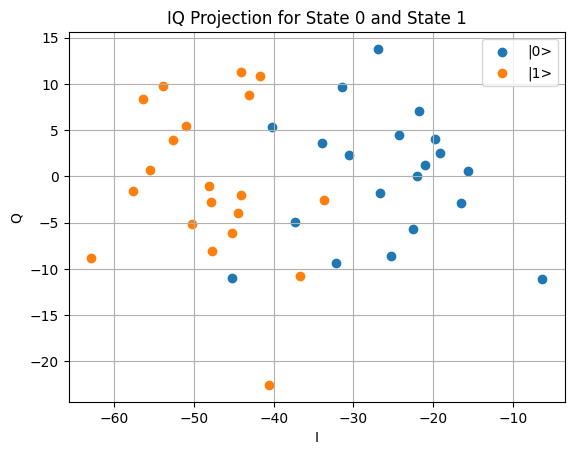

CPU times: user 7.03 s, sys: 5.56 s, total: 12.6 s
Wall time: 1min 56s


In [4]:
%%time
run(total_signal_time=3.51 * 10 ** (-6), pulse_samples_number=2 ** 25)